Authors: Anirudh Putrevu, Neeraj Nagpal, Vipul Maingi

Course: AML 

Topic:  Image Depth Training using ML techniques 

https://www.kaggle.com/kmader/showing-the-rgbd-images/notebook data download link

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from sklearn.neural_network import MLPRegressor
from tensorflow.keras.layers import Dense,Conv2D, Dropout, Activation, MaxPooling2D, Flatten
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor, RegressorChain
from sklearn.svm import LinearSVR
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
import seaborn as sns
from tensorflow import keras
import tensorflow as tf
from sklearn.decomposition import PCA
import random
from sklearn import linear_model
from sklearn.linear_model import RidgeCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVR
from sklearn import svm
from sklearn.linear_model import LassoCV
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.tree import DecisionTreeRegressor

In [2]:
#Loading RGB and DEPTH FILES      ************* change path to your file

b = np.load('/Users/anirudhputrevu/Downloads/results/depth_training_data.npz')
print(b.files)
data_rgb = b['rgb_images']                # RGB DATA 
data_depth = b['depth_maps']              # DEPTH DATA 
print("data rgb shape", data_rgb.shape)
print("data rgb shape", data_depth.shape)

['rgb_images', 'depth_maps']
data rgb shape (3500, 3, 96, 96)
data rgb shape (3500, 1, 96, 96)


In [3]:
#Normalizing the data
data_rgb = data_rgb/255
np.mean(data_rgb) 
print("data_rgb min",data_rgb.min())
print("data_rgb max",data_rgb.max())

data_rgb min 0.0
data_rgb max 1.0


In [4]:
print("data_depth.min",data_depth.min()) 
print("data_depth.max",data_depth.max()) 
data_depth = data_depth - data_depth.min()
print("data_depth.min",data_depth.min()) 
print("data_depth.max",data_depth.max())  

data_depth.min -1.0
data_depth.max 0.20445603
data_depth.min 0.0
data_depth.max 1.2044561


In [5]:
data_rgb = data_rgb.astype(np.float32)       # size(type) modification for nn 
data_depth = data_depth.astype(np.float32)

In [6]:
# switch axes for plotting
data_rgb = data_rgb.transpose(0,2,3,1)
data_depth = data_depth.transpose(0,2,3,1)

In [7]:
print("rgb data shape",data_rgb.shape)
print("depth data shape",data_depth.shape)

rgb data shape (3500, 96, 96, 3)
depth data shape (3500, 96, 96, 1)


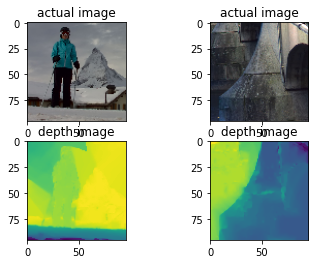

In [8]:
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(data_rgb[2900])
axarr[0,1].imshow(data_rgb[320])
axarr[0,0].set_title('actual image')
axarr[1,0].set_title('depth image')
axarr[0,1].set_title('actual image')
axarr[1,1].set_title('depth image')
axarr[1,0].imshow(data_depth[2900])
axarr[1,1].imshow(data_depth[320])

In [9]:
# shuffle images
random.seed(400)
random.shuffle(data_depth)     # inplace method
random.seed(400)
random.shuffle(data_rgb)

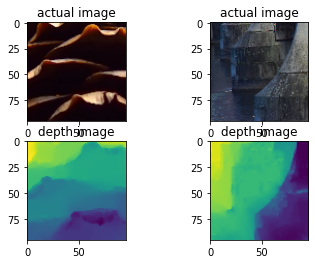

In [10]:
# checking image shuffling
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(data_rgb[2900])
axarr[0,1].imshow(data_rgb[320])
axarr[0,0].set_title('actual image')
axarr[1,0].set_title('depth image')
axarr[0,1].set_title('actual image')
axarr[1,1].set_title('depth image')
axarr[1,0].imshow(data_depth[2900])
axarr[1,1].imshow(data_depth[320])

In [56]:
# uncomment for running a small batch
'''data_rgb = data_rgb[:500]
data_depth= data_depth[:500]
data_rgb.shape,data_depth.shape'''
X = data_rgb.reshape(data_rgb.shape[0],27648)
Y = data_depth.reshape(data_depth.shape[0],9216)

# Splitting the data into train and test sets

In [57]:
#Splitting data into train and test dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.20, random_state = 0)

## Creating the Linear regression model:
### mse = 0.0357 , cv mse = 0.014 

In [58]:
Lreg = LinearRegression()
Lreg.fit(x_train, y_train)
pred_Lreg_test = Lreg.predict(x_test)
Lreg_mse_test = mean_squared_error(y_test, pred_Lreg_test)
print("The mean Square error for the testdata for linear regression model is %4.4f"%(Lreg_mse_test))

model = LinearRegression() 


The mean Square error for the testdata for linear regression model is 0.0357


In [59]:
s = cross_val_score(Lreg, X[:1000], Y[:1000] , cv=5,
                    n_jobs=-1, scoring="neg_mean_squared_error")

m = np.abs(np.mean(s))
print("model mse is %3.5f"% m )    

model mse is 0.01465


<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, *, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

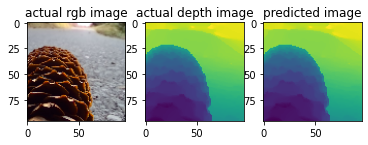

In [60]:
# predicting on training data for plotting
pred_Lreg_plot = Lreg.predict(x_test)

f, axarr = plt.subplots(1,3)
axarr[0].imshow(x_test[93].reshape(96,96,3)) # actual rgb
axarr[1].imshow(y_test[93].reshape(96,96,1)) # actual depth
axarr[2].imshow(pred_Lreg_plot[93].reshape(96,96,1)) # predicted image
axarr[0].set_title('actual rgb image')
axarr[1].set_title('actual depth image')
axarr[2].set_title('predicted image')

plt.imshow

## Now Creating Linear model using Ridge regularization:
### best mse = 0.0111 when C=10 

In [ ]:
def linr(x,y,alphaa_rcv):
    l2regg_rcv = linear_model.Ridge(alpha = alphaa_rcv)
    l2regg_rcv = l2regg_rcv.fit(x, y)
    l2regg_pred1 = l2regg_rcv.predict(x_test)
    ridge_mse_test = mean_squared_error(y_test,l2regg_pred1)
    print("The MSE for Ridge regression when C ={} is {}".format(alphaa_rcv, ridge_mse_test))
    return l2regg_rcv,l2regg_pred1, alphaa_rcv

l2regg_rcv1,l2regg_pred11,alphaa_rcv1 = linr(x_train,y_train,0.01)
l2regg_rcv2,l2regg_pred12,alphaa_rcv2= linr(x_train,y_train,0.1)
l2regg_rcv3,l2regg_pred13,alphaa_rcv3= linr(x_train,y_train,0.5)
l2regg_rcv4,l2regg_pred14,alphaa_rcv4 = linr(x_train,y_train,1)
l2regg_rcv5,l2regg_pred15,alphaa_rcv5 = linr(x_train,y_train,2)
l2regg_rcv6,l2regg_pred16,alphaa_rcv6 = linr(x_train,y_train,5)
l2regg_rcv7,l2regg_pred17,alphaa_rcv7 = linr(x_train,y_train,10)

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, *, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

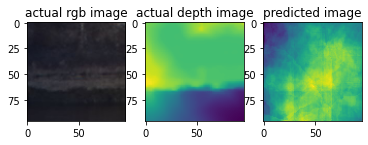

In [61]:
# predicting on train data to plot. C = 10

l2regg_rcv = linear_model.Ridge(alpha = 10)
l2regg_rcv = l2regg_rcv.fit(x_train, y_train)
l2regg_pred1 = l2regg_rcv.predict(x_test)

f, axarr = plt.subplots(1,3)
axarr[0].imshow(x_test[103].reshape(96,96,3)) # actual rgb
axarr[1].imshow(y_test[103].reshape(96,96,1)) # actual depth
axarr[2].imshow(l2regg_pred1[103].reshape(96,96,1)) # predicted image
axarr[0].set_title('actual rgb image')
axarr[1].set_title('actual depth image')
axarr[2].set_title('predicted image')

plt.imshow

## Ridge CV
### best mse = 0.11 at C= 10 . same result as above

In [ ]:
def lin(x,y,alphaa_rcv):
    l2regg_rcv = RidgeCV(alphas= alphaa_rcv)
    l2regg_rcv = l2regg_rcv.fit(x, y)
    l2regg_pred = l2regg_rcv.predict(x_test)
    ridge_mse_test = mean_squared_error(y_test, l2regg_pred)
    print("The MSE for Ridge CV when C ={} is {}".format(alphaa_rcv, ridge_mse_test))
    return l2regg_rcv,l2regg_pred,alphaa_rcv

l2regg_rcv1,l2regg_pred1,alphaa_rcv1 = lin(x_train,y_train,0.01)
l2regg_rcv2,l2regg_pred2,alphaa_rcv2 = lin(x_train,y_train,0.1)
l2regg_rcv3,l2regg_pred3,alphaa_rcv3 = lin(x_train,y_train,0.5)
l2regg_rcv4,l2regg_pred4,alphaa_rcv4 = lin(x_train,y_train,1)
l2regg_rcv5,l2regg_pred5,alphaa_rcv5 = lin(x_train,y_train,2)
l2regg_rcv6,l2regg_pred6,alphaa_rcv6 = lin(x_train,y_train,5)
l2regg_rcv7,l2regg_pred7,alphaa_rcv7 = lin(x_train,y_train,10)

In [ ]:
print("best mse is 0.011 at c= 10")

## KNN
### best k = 1 , mse = 0.0081

In [71]:
score = []
for i in range(1,31):
    knn1 = KNeighborsRegressor(n_neighbors=i)   
    knn1.fit(x_train ,y_train)
    y_pred= knn1.predict(x_test)
    score.append(np.abs(mean_squared_error(y_pred,y_test)))
a = np.argmin(score)
print(a)
print(score)
# best k at 1

0
[0.008197237, 0.009620379, 0.011250146, 0.01220933, 0.013239877, 0.0133469235, 0.013782582, 0.013767428, 0.013904578, 0.013778944, 0.013913553, 0.013874064, 0.013839738, 0.013945553, 0.014012156, 0.014139758, 0.014283359, 0.014397981, 0.014446314, 0.01449777, 0.014558279, 0.0146290315, 0.01470585, 0.014866862, 0.01488652, 0.0149138225, 0.014974228, 0.01496663, 0.014882351, 0.014864357]


<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, *, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

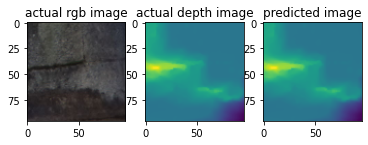

In [70]:
# predicting on training for plotting, using best k 
knn1 = KNeighborsRegressor(n_neighbors= 1)
knn1.fit(x_train, y_train)
y_pred= knn1.predict(x_test)

f, axarr = plt.subplots(1,3)
axarr[0].imshow(x_test[43].reshape(96,96,3)) # actual rgb
axarr[1].imshow(y_test[43].reshape(96,96,1)) # actual depth
axarr[2].imshow(y_pred[43].reshape(96,96,1)) # predicted image
axarr[0].set_title('actual rgb image')
axarr[1].set_title('actual depth image')
axarr[2].set_title('predicted image')

plt.imshow


## Now creating model using neural networks
###  best mse = 0.006 when alpha = 0.0001

In [ ]:
def MLNR(x,y,c):
    mln_reg= MLPRegressor(hidden_layer_sizes=(128, 128, 64, 32), alpha = c)
    mln_reg = mln_reg.fit(x, y)
    mln_reg_pred = mln_reg.predict(x_test)
    mln_mse_test = mean_squared_error(y_test,mln_reg_pred)
    print("The Mean square error using the MLP Regressor when alpha ={} is {}".format(c,mln_mse_test))
    return mln_reg, mln_reg_pred, mln_mse_test
    

mln_reg1, mln_reg_pred1, mln_mse_test1 = MLNR(x_train,y_train,0.0001)
mln_reg2, mln_reg_pred2, mln_mse_test2 = MLNR(x_train,y_train,0.001)
mln_reg3, mln_reg_pred3, mln_mse_test3 = MLNR(x_train,y_train,0.01)
mln_reg4, mln_reg_pred4, mln_mse_test4 = MLNR(x_train,y_train,0.1)
mln_reg5, mln_reg_pred5, mln_mse_test5 = MLNR(x_train,y_train,1)
mln_reg6, mln_reg_pred6, mln_mse_test6 = MLNR(x_train,y_train,10)
mln_reg7, mln_reg_pred7, mln_mse_test7 = MLNR(x_train,y_train,100)

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, *, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

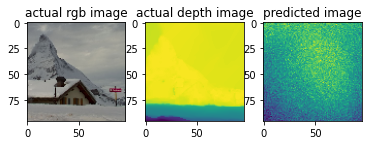

In [73]:
# predicting on training for plotting
ln_reg= MLPRegressor(hidden_layer_sizes=(128, 128, 64, 32), alpha = 0.0001)
mln_reg = ln_reg.fit(x_train, y_train)
mln_reg_pred = mln_reg.predict(x_test)

f, axarr = plt.subplots(1,3)
axarr[0].imshow(x_test[300].reshape(96,96,3)) # actual rgb
axarr[1].imshow(y_test[300].reshape(96,96,1)) # actual depth
axarr[2].imshow(mln_reg_pred[300].reshape(96,96,1)) # predicted image
axarr[0].set_title('actual rgb image')
axarr[1].set_title('actual depth image')
axarr[2].set_title('predicted image')

plt.imshow


## Now Creating model using neural networks using 2 hidden layers
### best mse = 0.0107 at alpha = 0.0001

In [51]:
def MLN(x,y,c):
    mln_reg= MLPRegressor(hidden_layer_sizes=(128,64), alpha = c)
    mln_reg = mln_reg.fit(x, y)
    mln_reg_pred = mln_reg.predict(x_test)
    mln_mse_test = mean_squared_error(y_test,mln_reg_pred)
    print("The Mean square error using the MLP Regressor when alpha ={} is {}".format(c,mln_mse_test))
    return mln_reg, mln_reg_pred, mln_mse_test
    
mln_reg1, mln_reg_pred1, mln_mse_test1 = MLN(x_train,y_train,0.0001)
mln_reg2, mln_reg_pred2, mln_mse_test2 = MLN(x_train,y_train,0.001)
mln_reg3, mln_reg_pred3, mln_mse_test3 = MLN(x_train,y_train,0.01)
mln_reg4, mln_reg_pred4, mln_mse_test4 = MLN(x_train,y_train,0.1)
mln_reg5, mln_reg_pred5, mln_mse_test5 = MLN(x_train,y_train,1)
mln_reg6, mln_reg_pred6, mln_mse_test6 = MLN(x_train,y_train,10)
#mln_reg7, mln_reg_pred7, mln_mse_test7 = MLN(x_train,y_train,100)

The Mean square error using the MLP Regressor when alpha =0.0001 is 0.004280258901417255
The Mean square error using the MLP Regressor when alpha =0.001 is 0.004375399090349674
The Mean square error using the MLP Regressor when alpha =0.01 is 0.004683279432356358
The Mean square error using the MLP Regressor when alpha =0.1 is 0.01097160205245018
The Mean square error using the MLP Regressor when alpha =1 is 0.025312460958957672
The Mean square error using the MLP Regressor when alpha =10 is 0.022789068520069122


<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, *, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

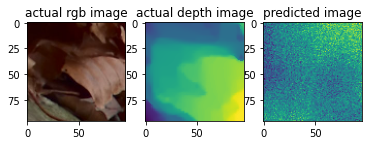

In [74]:
# plotting, using alphaa as 0.0001
ln_reg= MLPRegressor(hidden_layer_sizes=(128, 64), alpha = 0.0001)
m = ln_reg.fit(x_train, y_train)
mln_reg_pred = m.predict(x_test)

f, axarr = plt.subplots(1,3)
axarr[0].imshow(x_test[325].reshape(96,96,3)) # actual rgb
axarr[1].imshow(y_test[325].reshape(96,96,1)) # actual depth
axarr[2].imshow(mln_reg_pred[325].reshape(96,96,1)) # predicted image
axarr[0].set_title('actual rgb image')
axarr[1].set_title('actual depth image')
axarr[2].set_title('predicted image')

plt.imshow

## performing convolution on x (using 1000 data images for computation) 

In [12]:
# run model with convolved xbelow
######## applying layered filtering to obtain features for x . (128 filters, 3x3 kernel)


input_shape = data_rgb.shape

x = data_rgb[:1000]
y = tf.keras.layers.Conv2D(128, 3, activation='relu', input_shape=input_shape[1:])(x)
x_f = tf.keras.layers.MaxPool2D()(y)
x_f.shape
y1 = tf.keras.layers.Conv2D(64, 3, activation='relu')(x_f)
y1.shape
x_ff = tf.keras.layers.MaxPool2D()(y1)
x_ff.shape
y11 = tf.keras.layers.Conv2D(96, 3, activation='relu')(x_ff)
y11.shape
x_fff = tf.keras.layers.MaxPool2D()(y11)
x_fff.shape

x_fff = tf.keras.layers.GlobalAveragePooling2D()(x_fff) 
print("X convoluted :",x_fff.shape)

2021-12-12 23:29:51.709029: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


X convoluted : (1000, 96)


In [13]:
#Splitting X convoluted data into train and test dataset
xnew = x_fff.numpy()
print("xnew = xconvoluted = [1000, 96]")
print("Y = depth data reshaped to from 3d to 2d" ,Y.shape)

x_train, x_test = train_test_split(xnew, test_size= 0.20, random_state = 0)
y_train, y_test = train_test_split(Y[:1000], test_size= 0.20, random_state = 0)


xnew = xconvoluted = [1000, 96]
Y = depth data reshaped to from 3d to 2d (3500, 9216)


In [15]:
xrb_train, xrb_test = train_test_split(data_rgb[:1000], test_size= 0.20, random_state = 0)
print("storing color img data for comparison later")

storing color img data for comparison later


### Lin reg using convoluted X :
### 

In [ ]:
print(x_train.shape)
print(y_train.shape)

In [48]:
Lreg = LinearRegression()
Lreg.fit(x_train, y_train)             
pred_Lreg_test = Lreg.predict(x_test)
Lreg_mse_test = mean_squared_error(y_test, pred_Lreg_test)
print("The mean Square error for the testdata for linear regression model is %4.4f"%(Lreg_mse_test))

The mean Square error for the testdata for linear regression model is 0.0021


#### mean squared error = 0.002 , cross val mse  = 0.01141

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, *, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

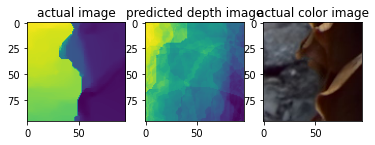

In [50]:
# predicting on training for plotting

l = Lreg.fit(x_train, y_train)
ypred = l.predict(x_test)

f, axarr = plt.subplots(1,3)

axarr[0].imshow(y_test[70].reshape(96,96,1)) # actual depth
axarr[1].imshow(ypred[70].reshape(96,96,1)) # predicted image
axarr[2].imshow(xrb_test[70].reshape(96,96,3)) # predicted image
axarr[0].set_title('actual image')
axarr[1].set_title('predicted depth image')
axarr[2].set_title('actual color image')

plt.imshow


In [ ]:
###crossvalidating cv = 5  , mse = 0.011

In [ ]:
s = cross_val_score(Lreg, xnew, Y[:1000] , cv=5,
                    n_jobs=-1, scoring="neg_mean_squared_error")

m = np.abs(np.mean(s))
print("model mse is %3.5f"% m )    

### Lin regularized model with Ridge on convoluted X  - 
### 

In [ ]:
def linr(x,y,alphaa_rcv):
    l2regg_rcv = linear_model.Ridge(alpha = alphaa_rcv)
    l2regg_rcv = l2regg_rcv.fit(x, y)
    l2regg_pred1 = l2regg_rcv.predict(x_test)
    ridge_mse_test = mean_squared_error(y_test,l2regg_pred1)
    print("The MSE for Ridge regression when C ={} is {}".format(alphaa_rcv, ridge_mse_test))
    return l2regg_rcv,l2regg_pred1, alphaa_rcv

l2regg_rcv1,l2regg_pred11,alphaa_rcv1 = linr(x_train,y_train,0.001)


#### MSE = 0.0021 ,  C = 0.001 

## cv on Ridge 
### mse = 0.006

In [46]:
r = RidgeCV(cv = 5, scoring= "neg_mean_squared_error")
r1 = r.fit(x_train, y_train)
r = r1.predict(x_test)
print(np.abs(r1.best_score_))
print("mse")


0.006421039346605539
mse


### similar results as 

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, *, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

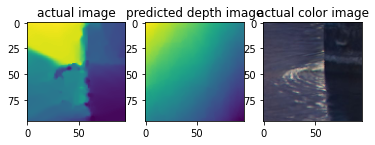

In [47]:
# predicting on training for plotting
l2regg_rcv = RidgeCV(alphas= 10)
l2regg_rcv = l2regg_rcv.fit(x_train, y_train)
l2regg_pred = l2regg_rcv.predict(x_test)

f, axarr = plt.subplots(1,3)

axarr[0].imshow(y_test[80].reshape(96,96,1)) # actual depth
axarr[1].imshow(l2regg_pred[80].reshape(96,96,1)) # predicted image
axarr[2].imshow(xrb_test[80].reshape(96,96,3)) # predicted image
axarr[0].set_title('actual image')
axarr[1].set_title('predicted depth image')
axarr[2].set_title('actual color image')

plt.imshow


## knn using convoluted x 
#### best k =  1 , mse =  0.0016

In [17]:
score = []
for i in range(1,31):
    knn1 = KNeighborsRegressor(n_neighbors=i)   
    knn1.fit(x_train ,y_train)
    y_pred= knn1.predict(x_test)
    score.append(np.abs(mean_squared_error(y_pred,y_test)))
a = np.argmin(score)
#print(a)
print("best k= ",a , "with  mean sq error on test data=",score[a])
score

best k=  1 with  mean sq error on test data= 0.0018812844


[0.0019085126,
 0.0018812844,
 0.0018828809,
 0.0019414048,
 0.0019021569,
 0.0019090138,
 0.0020044455,
 0.0020956835,
 0.0022287006,
 0.0023410101,
 0.0024090568,
 0.002470775,
 0.0025361704,
 0.0026036329,
 0.0026518903,
 0.0027295528,
 0.0027739075,
 0.0028166252,
 0.0028973292,
 0.0029766378,
 0.0030246663,
 0.0030914617,
 0.0031709566,
 0.0032137944,
 0.0033014514,
 0.0033868845,
 0.0034549506,
 0.0034990045,
 0.0035204473,
 0.0035904811]

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, *, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

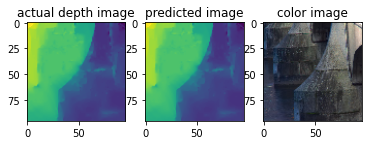

In [45]:
# plot at best k. on training data
# predictoing on training for plotting, using best k 
knn1 = KNeighborsRegressor(n_neighbors= a)   
knn1.fit(x_train ,y_train)
y_pred= knn1.predict(x_test)                   # pred depth

f, axarr = plt.subplots(1,3)

# To display more images, chng the value for y_test, y_pred, xrb_test

axarr[0].imshow(y_test[34].reshape(96,96,1))             # actual depth
axarr[1].imshow(y_pred[34].reshape(96,96,1))           # predicted image
axarr[2].imshow(xrb_test[34].reshape(96,96,3))

axarr[0].set_title('actual depth image')
axarr[1].set_title('predicted image')
axarr[2].set_title('color image')
plt.imshow




## Convoluted Neural net (CNN) 
### mse = 0.008

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D, Dropout, Activation, MaxPooling2D, Flatten

inputs = tf.keras.Input(shape=(96, 96, 3))
x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(inputs) # extracts 64 features
x  # no padding and strides-> shape = n_row - f_row + 1 = 94
x = tf.keras.layers.MaxPool2D()(x)                                      # downsizing matrix by selecting max val
x
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
x   # takes 32 features 
x = tf.keras.layers.MaxPool2D()(x)
x
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x

x = tf.keras.layers.Dense(64, activation='linear')(x)
outputs = tf.keras.layers.Dense(1, activation='linear')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam',loss='mse')

s = model.fit(data_rgb,data_depth.reshape(3500,9216),validation_split=0.2,epochs=50,batch_size=30)

print("at 50 epoch mse loss: 0.0083 - val_loss: 0.0095")

### Following models are fitted using less data for computation reasons

In [ ]:
X = data_rgb.reshape(data_rgb.shape[0],27648)
Y = data_depth.reshape(data_depth.shape[0],9216)

In [ ]:
#Splitting data into train and test dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.20, random_state = 0)


### 1. Random Forest

In [ ]:


def random(x,y,n_est, max_d, m_s_l):
    Randomforest = RandomForestRegressor(n_estimators=n_est, max_depth=(max_d),min_samples_leaf=(m_s_l),oob_score=(True))
    Randomforest = Randomforest.fit(x,y)
    random_forest_pred = Randomforest.predict(x_test)
    mserandom = mean_squared_error(y_test,random_forest_pred)
    print("The MSE error for Random forest is {}".format(mserandom))
    return Randomforest, random_forest_pred, mserandom


Randomforest1, random_forest_pred1, mserandom1 = random(x_train[:20], y_train, 5, 100, 10,2)
Randomforest1, random_forest_pred1, mserandom1 = random(x_train[:20], y_train, 2, 90, 13,2)
Randomforest1, random_forest_pred1, mserandom1 = random(x_train[:20], y_train, 4, 40, 12,2) 

In [ ]:
## mse = 0.0060 (n_est 500,depth 100, min leaf sample (10), oob_score= 2)

### 2. Decision Tree Regressor

In [ ]:
def DecisionTree(x,y,randomstate, s, m_depth,m_samples):
    regressor = DecisionTreeRegressor(random_state=randomstate,splitter = s,max_depth=m_depth , min_samples_leaf=m_samples)
    regressor = regressor.fit(x_train, y_train)
    pred_decison = regressor.predict(x_test)
    mse_regressor = mean_squared_error(y_test,pred_decison)
    print("The MSE error for Decision Tree Regressor model for random state = {} is {}".format(randomstate,mse_regressor))
    return regressor, pred_decison, mse_regressor

regressor1, pred_decison1, mse_regressor1 = DecisionTree(x_train, y_train, 0,'best', 5, 100)
regressor2, pred_decison2, mse_regressor2 = DecisionTree(x_train, y_train, 0, 'random',5,100)
regressor3, pred_decison3, mse_regressor3 = DecisionTree(x_train, y_train, 0, 'random',10,100)
regressor4, pred_decison4, mse_regressor4 = DecisionTree(x_train, y_train, 0, 'best',10,100)

In [ ]:
## mse = 0.0045

### 3. SVR using chain  # couldn't run

In [ ]:
def rbfsvm(x,y,c,k):
    rbf_svm = svm.SVR(C=c, kernel = k, epsilon=0.1)
    wrapper = RegressorChain(rbf_svm, order=[0,1])
    wrapper = rbf_svm.fit(x, y)
    rbf_svm_pred = wrapper.predict(x_test)
    rbf_mse_test = mean_squared_error(y_test,rbf_svm_pred)
    print("The Mean square error using the MLP Regressor when alpha ={} is {}".format(c,mln_mse_test))
    
    return wrapper,rbf_svm_pred,c,mln_mse_test
    
wrapper1, rbf_svm_pred, CC1, mln_mse_test = rbfsvm(x_train,y_train,0.0001,'linear')

### 4. Lasso regularization cv # couldn't run

In [ ]:
def lasso_reg(x,y,alphaa_rcv):
    l2 = linear_model.Lasso(alpha = alphaa_rcv)
    l2 = l2.fit(x, y)
    l2pred = l2.predict(x_test)
    ridge_mse_test = mean_squared_error(y_test,l2pred)
    print("The MSE for Ridge CV when C ={} is {}".format(alphaa_rcv, ridge_mse_test))
    return l2,l2pred,alphaa_rcv, ridge_mse_test


l2,l2pred1,alphaa_rcv1, ridge_mse_test1 = lasso_reg(x_train,y_train,0.01)

# mse = 0.0031, c = 0.01

In [ ]:
f, axarr = plt.subplots(1,3)
axarr[0].imshow(x_test[93].reshape(96,96,3)) # actual rgb
axarr[1].imshow(y_test[93].reshape(96,96,1)) # actual depth
axarr[2].imshow(l2pred[93].reshape(96,96,1)) # predicted image
axarr[0].set_title('actual rgb image')
axarr[1].set_title('actual depth image')
axarr[2].set_title('predicted image')

plt.imshow